### 파이썬으로 데이터 마이닝 시작하기
## Ch 4 - 분석을 위한 데이터 클리닝과 준비
### Copyright: Nathan Greeneltch, PhD 2019

#### These code examples and description are meant to accompany the book "Python Data Mining Quick Start Guide" by Nathan Greeneltch. For full background on the topics and introduction sections, please purchase the book. 

#### 제4장 학습내용
* 입력 데이터 클리닝
* 결측값(missing value) 처리
* 정규화와 표준화
* 범주형 데이터 처리
* 고차원 데이터와 차원성의 저주
* 필터와 래퍼 기법을 활용한 특징 선택
* 변환이 적용된 특징 선택

In [50]:
# 모듈을 임포트한다
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("paper", font_scale=1.5)
sns.set_style("white")

## 입력 데이터 클리닝

실제 데이터는 깨끗하지 않은 경우가 많고, 유용한 인사이트를 얻기 위해서는 클리닝(cleaning)을 거쳐야 한다. 결측값 혹은 오염된 값은 잘못된 결론을 내리거나 인사이트를 놓치게 할 수 있다. 데이터의 품질은 특징 스케일링, 변수 형태 등과 더불어 분석 기법의 효율성에서 매우 중요하다. 

### 결측값(missing values)

결측값은 데이터마이닝 프로젝트를 망칠 수도 있다. 한 열이나 행 전체가 없을 수도 있고, 때에 따라서는 단일 셀 혹은 레코드 안의 값이 없을 수도 있다. 후자의 경우는 찾아내기 어렵고, 이런 것들은 특별한 이유 없이도 분석 작업을 실패하게 할 수 있다.

결측값이 담긴 데이터의 모습이다.

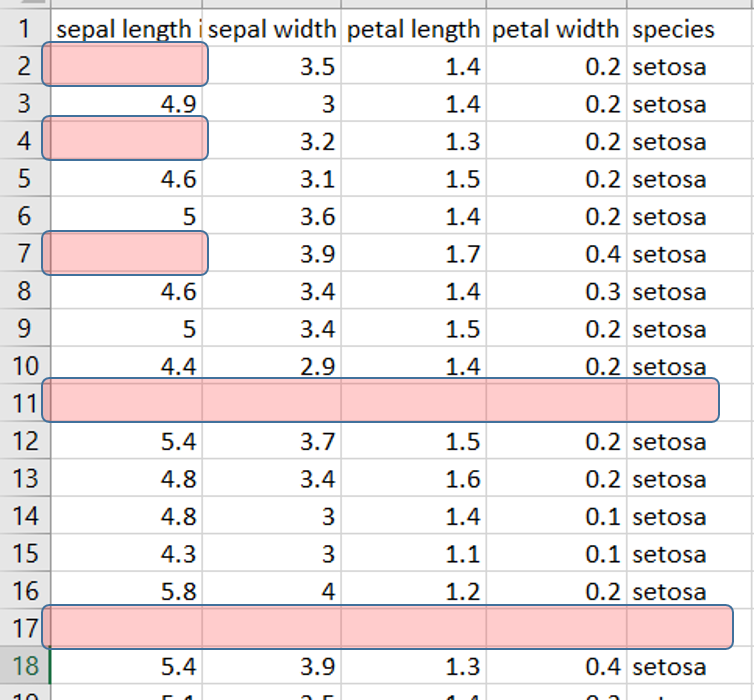

In [51]:
from IPython.display import Image
Image("C:/Users/jy990/anaconda3/DMI/data cleaning/data/missing_data_spreadsheet.png")

iris_missing_values 데이터셋을 메모리에 로딩하는 것부터 시작하자.

In [52]:
# 결측값을 갖는 iris 데이터셋 로딩하기
df = pd.read_csv("C:/Users/jy990/anaconda3/DMI/data cleaning/data/iris_missing_values.csv")
df.index.name = "record"
df.head(6)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
record,,,,,
0,NaN,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,NaN,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,NaN,3.9,1.7,0.4,setosa


로딩할 때, pandas는 데이터프레임의 결측값을 NaN으로 채운다.

#### 결측값 찾기와 제거하기

결측값은 단일 셀 혹은 전체 행에 걸쳐 발생할 수 있고, 종종 분석가에게 발견되지 않는다. 그러므로 결측값을 찾아내고, 세고, 제거하거나 대체하기 위한 도구가 필요하다. 이는 pandas에 들어있는 함수가 아주 유용하게 사용되는 영역이다. pandas는 결측값을 NaN으로 채운다. 데이터가 데이터프레임에 로딩되면, **.isnull()** 기법을 통해 모든 null값을 찾을 수 있다. 대부분의 데이터는 각 셀별로 점검하기에 너무 양이 많으므로, pandas는 결측값을 점검하고 필요한 경우 셀 수 있는 방법을 제공한다. 이 기법들은 다음과 같다.

* .isnull().values.any()
* .isnull().values.sum() 

이 pandas 기법들은 데이터프레임 전체 혹은 특정 열에서 작동한다. 편의상 여기서는 단일 열에 집중한다.

먼저 결측을 찾고 몇 개나 있는지 세어보자.

In [53]:
# NaN에 대한 각 데이터의 참/거짓 값을 얻는다 
df['sepal length in cm'].isnull()

record
0       True
1      False
2       True
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal length in cm, Length: 150, dtype: bool

In [54]:
# 열에서 결측값이 있는지 점검한다
print(df['sepal length in cm'].isnull().values.any())

# 열에서 결측값의 수 확인한다
print(df['sepal length in cm'].isnull().values.sum())

True
6


꽃받침 길이(sepal length in cm) 열에 결측값이 있고, 그것의 개수는 6이다.

In [55]:
print(df['sepal width in cm'].isnull().values.any())
print(df['sepal width in cm'].isnull().values.sum())

True
3


In [56]:
print(df['petal length in cm'].isnull().values.any())
print(df['petal length in cm'].isnull().values.sum())

True
3


In [57]:
print(df['petal width in cm'].isnull().values.any())
print(df['petal width in cm'].isnull().values.sum())

True
3


결측값은 원하는 값으로 대체할 수 있다. 편의상 빈 셀에 문자열 값을 채워 넣는다.

In [58]:
# 결측값을 새로운 값으로 채우고, 새로운 df_example 데이터프레임에 저장한다 
df_example = df['sepal length in cm'].fillna('example')
df_example.head()

record
0    example
1        4.9
2    example
3        4.6
4        5.0
Name: sepal length in cm, dtype: object

교체하기를 원하지 않는 결측값의 행이나 열을 쉽게 제거할 수 있다.

In [59]:
# 결측값이 있는 행(axis=0)을 제거한다
df_dropped = df.dropna(axis=0)
df_dropped.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
record,,,,,
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa


In [60]:
print(df.shape)
print(df_dropped.shape)

(150, 5)
(144, 5)


여기서 레코드 0, 2, 5는 제거됐기 때문에 보이지 않는다. 비슷한 방법으로 다음과 같이 열을 제거할 수 있다.

In [61]:
print(df_dropped['sepal length in cm'].isnull().values.sum())
print(df_dropped['sepal width in cm'].isnull().values.sum())
print(df_dropped['petal length in cm'].isnull().values.sum())
print(df_dropped['petal width in cm'].isnull().values.sum())

0
0
0
0


In [62]:
# 결측값이 있는 열(axis=1)을 제거한다
df_dropped = df.dropna(axis=1)
df_dropped.head()

""
record
0
1
2
3
4


#### 결측값을 대체하기 위한 임퓨팅(Imputing)

띄엄띄엄 결측값이 있는 경우, 빈 셀의 대체 값을 예측할 수 있다. 이 값들을 예측하는 수학적인 장치를 임퓨터(imputor)라고 부른다. scikit-learn은 **SimpleImputer()** 라 불리는 기법을 내장하고 있다. 이 기법은 다음 두 가지 옵션을 갖고 있다.

* missing_values : 데이터에서 결측값의 형태를 가리킨다 (예: nan, 0, n/a 등).
* strategy : 임퓨트 기법을 의미한다 ("mean", "median", "most frequent", "constant"에서 선택할 수 있다).

**strategy**=*constant* 로 설정하면, 상수를 정하기 위해 **fill_value** 옵션을 사용할 수 있다. 

이제 SimpleImputer 라이브러리를 임포트하고 imputer 객체를 생성하자. 다음과 같이 missing_values = np.nan과 strategy="mean" 옵션을 사용할 것이다.

In [63]:
# scikit-learn에서 임퓨터 모듈을 임포트하고 임퓨터 객체를 초기화한다
# 임퓨팅(imputing) = 대체, 삽입으로 해석
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # 결측값을 뭘로 채우느냐? 여기선 평균이지만 med, mode 등 사용 가능

# 임퓨트할 열을 정의한다
cols = ['sepal length in cm',
         'sepal width in cm',
         'petal length in cm',
         'petal width in cm',]

다음으로 임퓨터를 적합시키고 입력 데이터를 변환해서 df_new라는 새로운 데이터프레임에 저장한다.

In [64]:
# 임퓨터를 적합시키고 데이터를 변환한 뒤 df_new에 저장한다
out_imp = imputer.fit_transform(df[cols])
df_new = pd.DataFrame(data = out_imp, columns = cols)
df_new = pd.concat([df_new, df[['species']]], axis = 1) # df_new와 df[species]를 열 기준(1)으로 붙여라
df_new.head(6)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
0,5.870139,3.5,1.4,0.2,setosa
1,4.900000,3.0,1.4,0.2,setosa
2,5.870139,3.2,1.3,0.2,setosa
3,4.600000,3.1,1.5,0.2,setosa
4,5.000000,3.6,1.4,0.2,setosa
5,5.870139,3.9,1.7,0.4,setosa


레코드 0, 2, 5는 임퓨팅(imputing)된 값을 갖고, 그 값은 sepal length 열의 평균으로 선택되었다.

### 특징 스케일링(Feature Scaling)

상수를 곱해도 성질이 바뀌지 않는다면, 그 수학적 성질은 '스케일 불변(**scale-invariant**)으로 간주된다. 예를 들어, 곡선의 모양이 입력의 강도와 상관없이 동일한 경우다. 더 강력한 증거가 필요하다면, 음의 편향이 있는 분포를 상상해 보라. 이제 전체 분포에 3을 곱해보라. 이 분포의 모양은 여전히 음의 편향을 보여주게 된다.

스케일링(scaling)은 스케일 불변이 아닌 변환과 학습 알고리즘에 대해 중요하다. 스케일 불변이 아닌 알고리즘의 두 가지 예는 주요 요소 분석(PCA)과 패널티 회귀(penalized regression)다. 이 경우, 큰 값들은 알고리즘 내에서 매개변수 공간을 독점하게 된다. 그 결과는 몇몇 특징들(주로 가장 큰 스케일을 갖는 것)이 데이터마이닝의 결과에 과도한 영향을 미치게 된다는 것이다. 이 문제를 수정하는 전략은 각 특징을 비슷한 스케일로 적용하는 것이고, 향후 적용되는 기법은 스케일 대신 분산과 편향에 집중하게 된다. 스케일을 수정하는 가장 흔한 방법은 정규화(**normalization**)와 표준화(**standardization**)다.

다른 많은 스케일링 기법들도 존재하고, 그 기법들이 궁금하다면 복수의 스케일링 기법들을 비교하는 예들을 찾을 수 있다.\
(https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

In [65]:
# iris 데이터셋을 불러온다
df = pd.read_csv("C:/Users/jy990/anaconda3/DMI/data cleaning/data/iris.csv")
df.index.name = "record"

# 스케일링할 열을 정의한다
cols = ['sepal length in cm',
        'sepal width in cm',
        'petal length in cm',
        'petal width in cm']

#### 정규화(Normalization)

정규화는 모든 값이 0과 1 사이(혹은 -1과 1 사이)에 위치하도록 각 특징 공간을 리스케일(rescale)하는 것이다. 정규화를 수행하는 여러 가지 방법이 있지만, 가장 흔한 방법은 scikit-learn의 MinMaxScaler() 함수에 있는 루틴을 이용하는 것이다. 다음은 정규화 방법에 쓰이는 공식이다.

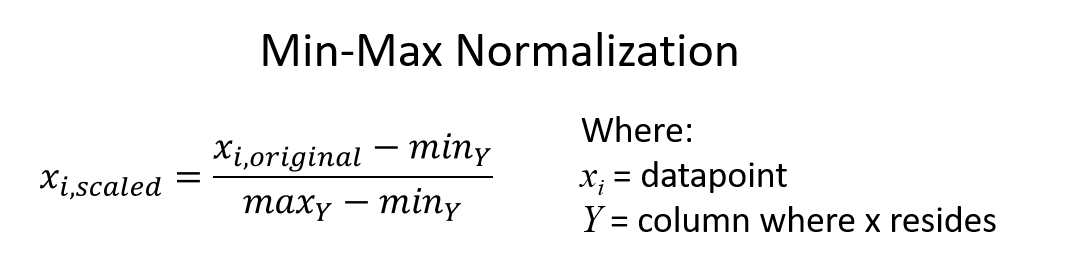

In [66]:
from IPython.display import Image
Image("C:/Users/jy990/anaconda3/DMI/data cleaning/data/min_mix_scaler.png")

TIP: 이 변환을 이상치로부터 보호할 수 있는 방법은 없으며, 이상치는 정규화하기 전에 제거해야 한다. 그렇지 않으면 합당한 데이터들이 0-1 전체의 범위에 적절하게 펼쳐지지 못하고 유용한 데이터는 더 적은 범위로 모이게 된다.

In [67]:
# 모듈을 로딩하고 객체를 초기화한다
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # 함수를 저장하는 방식. MinMax로 변환해주는 함수

# 데이터를 정규화하고 out_scaled numpy 행렬에 저장한다
out_scaled = scaler.fit_transform(df[cols])

#### 표준화(Standardization)

표준화(**Standardization**)는 같은 스케일 상의 각 특징 공간 내에서 변동을 위치시키기 위해 사용되며, 데이터를 단위 분산에 대해 펼치고 0에 중간을 맞춘다. 다른 값이 고급 표준화에 대해 선택될 수도 있지만 보통 평균=0, 분산=1이 가장 흔하다.

TIP: 표준화된 데이터의 최소값 혹은 최대값에 대한 제한은 없으며, 이에 따라 이상치 처리를 상대적으로 잘할 수 있고 이상치를 변환 후에 쉽게 판별할 수 있다. 게다가 scikit-learn은 변동을 측정하기 위해 표준편차 대신 사분위수 범위를 쓰므로 더욱 강력한 robust_scale 기법을 사용한다. 이런 이유로, 정규화 대신 표준화를 리스케일 기법으로 추천한다.

In [68]:
# 모듈을 로딩하고 객체를 초기화한다
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 데이터를 표준화하고 out_scaled numpy 행렬에 저장한다
out_scaled = scaler.fit_transform(df[cols])

### 범주형 데이터 처리

대부분의 데이터 마이닝과 머신 러닝 기법들은 연속 변수와 정수 입력에 대해 만들어졌다. 그 기법들은 문자열과 범주형 데이터를 직접 적용할 수 있도록 만들어지지 않았다. 그래서 데이터 컨디셔닝의 일부분은 범주형 데이터를 연속형 데이터와 비슷하게 만드는 것이다.

한 가지 유의할 점은 변수가 순서대로 돼 있는지 여부다. 예를 들어, 운동화 사이즈는 범주형 데이터인 동시에 순서적(**ordinal**)이다. 큰 사이즈는 큰 운동화를 의미하기 때문이다. 반면 운동화 색깔은 범주형 데이터이지만 순서적이 아니다. 다른 색깔은 크기와 관계없기 때문이다. 후자의 경우는 이런 변수들을 명목적(**nominal**)이라 부른다. 이 절에서는 원핫 인코딩(**one-hot encoding**)이라 부르는 기본적인 순서적 인코딩을 다룬다. 원핫 인코딩은 순서적 혹은 명목적 변수에 모두 사용된다. 그 다음에는 카테고리 타깃 변수를 간단한 단일 단계로 유용한 것으로 바꿔주는 레이블 인코딩(**label encoding**)을 다룬다.

예를 들어 female, male로 이루어진 gender 변수를 female, male 각각의 변수로 나눠 female이면 (1,0), male이면 (0,1) 이런 식으로 코딩하는 것이다.(nominal)
ordinal이면 순서대로 0,1,2,3 ... 으로 나아가 변수 개수를 길이로 하는 벡터가 만들어진다.

In [69]:
# long jump 데이터셋을 불러온다
df = pd.read_csv("C:/Users/jy990/anaconda3/DMI/data cleaning/data/long_jump.csv")
df.set_index('Person', inplace=True)

In [70]:
df.shape

(6, 8)

In [71]:
df

,Age,Height,Weight,Training Hours/week,Jersey Color,Jersey Size,Shoe Size,Long Jump
Person,,,,,,,,
Thomas,12,57.5,73.4,6.5,blue,small,7,19.2
Jane,13,65.5,85.3,8.9,green,medium,10,25.1
Vaughn,17,71.9,125.9,1.1,green,large,12,14.3
Vera,14,65.3,100.5,7.9,red,medium,9,18.3
Vincent,18,70.1,110.7,10.5,blue,large,12,21.1
Lei-Ann,12,52.3,70.4,0.5,blue,small,7,10.6


#### 순서적 인코딩(Ordinal Data Encoding)

순서적(**ordinal**) 변수는 순서가 있다. long jump 데이터셋에는 운동복 사이즈와 신발 사이즈가 있다. 두 변수 모두 큰 값은 실제로 큰 것을 의미한다. 즉, large는 항상 medium보다 크고, medium은 small보다 크다. 게다가 이러한 관계는 현실 세계에서의 순서 관계와 마찬가지다.

데이터에서 운동복 사이즈와 신발 사이즈 범주형 변수를 알아보자. 다음과 같이 그 변수들을 필터링한다.

In [72]:
# 범주형 변수 열에 필터를 적용한다
cats = ['Jersey Size', 'Shoe Size']
print(df[cats])

        Jersey Size  Shoe Size
Person                        
Thomas        small          7
Jane         medium         10
Vaughn        large         12
Vera         medium          9
Vincent       large         12
Lei-Ann       small          7


이제 scikit-learn의 **OrdinalEncoder** 라이브러리를 순서적 열을 인코딩하기 위해 사용한다. 항상 적절한 모듈을 임포트하고 인코더 객체를 예시하는 것부터 시작한다. 다음으로 입력 데이터에 객체를 적합시키고, 한 번에 **.fit_transform()** 기법으로 변환시킨다. 마지막으로 새로운 범주형과 결과 행렬을 **.categories_** 와 **out_enc**로 출력한다.

In [73]:
# 모듈을 임포트하고 enc 객체를 초기화한다
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

# 한 번에 객체를 적합 및 변환하고 범주를 출력한다
out_enc = enc.fit_transform(df[cats])
print('identified categories:', enc.categories_)
print()
print('encoded data: \n', out_enc)

identified categories: [array(['large', 'medium', 'small'], dtype=object), array([ 7,  9, 10, 12], dtype=int64)]

encoded data: 
 [[2. 0.]
 [1. 2.]
 [0. 3.]
 [1. 1.]
 [0. 3.]
 [2. 0.]]


첫 번째 특징("Jersey Size")에 대한 범주는 large, medium, small의 순서화된 리스트이고, 두 번째 특징("Shoe Size")에 대한 범주는 7, 9, 10, 12의 순서화된 리스트다. 결과 행렬은 다음에 출력된다. 이전의 두 순서화된 리스트를 통해 입력 데이터를 출력 데이터에 매핑시킬 수 있다. 이 인코딩 변환을 잘 적용해야 함에 유의하라.

다음으로 원래 데이터프레임의 원래 열을 새롭게 인코딩된 연속적 특징으로 다시 쓴다.

In [74]:
# 원래 데이터프레임에 범주형 특징을 다시 쓴다
df[cats] = out_enc
df

,Age,Height,Weight,Training Hours/week,Jersey Color,Jersey Size,Shoe Size,Long Jump
Person,,,,,,,,
Thomas,12,57.5,73.4,6.5,blue,2.0,0.0,19.2
Jane,13,65.5,85.3,8.9,green,1.0,2.0,25.1
Vaughn,17,71.9,125.9,1.1,green,0.0,3.0,14.3
Vera,14,65.3,100.5,7.9,red,1.0,1.0,18.3
Vincent,18,70.1,110.7,10.5,blue,0.0,3.0,21.1
Lei-Ann,12,52.3,70.4,0.5,blue,2.0,0.0,10.6


#### 원핫 인코딩(One-hot Enconding)

원핫(**one-hot**) 기법은 이진 기법(0과 1)을 사용해서 기계의 상태를 기록하는 전자공학의 한 방법에서 출발했다. 이 기법은 각 기계의 가능한 상태를 하나의 플래그로 정의하며, 현재의 상태와 맞는 플래그를 1로 하고 나머지 플래그를 0으로 하는 것이다. 통계학자들은 데이터마이닝과 머신러닝에서 범주형 변수들을 표시하기 위해 이 기법을 적용해왔다. 플래그(즉, 새로운 특징)는 원래 열의 각 가능한 값에 대해 정의하고, 레코드가 그 상태에 있으면 1이 되고, 나머지 플래그들은 0이 된다.

원핫 기법을 이해하는 가장 좋은 방법은 실제로 예제를 보는 것이다. 아래 테이블은 범주형 특징인 신발 사이즈에 대해 원핫 기법을 어떻게 적용하는지 보여준다. 원래 열은 7, 9, 10, 12의 값을 가지고 있다. 네 개의 가능한 값은 네 개의 플래그가 있고 네 개의 새로운 특징 열이 있음을 의미한다. 그리고 Shoe Size_7과 Shoe Size_9와 같은 알기 쉬운 이름을 사용할 수 있으며, 0과 1은 각 행에 대해(즉, 각 사람에 대해) 채워진다.

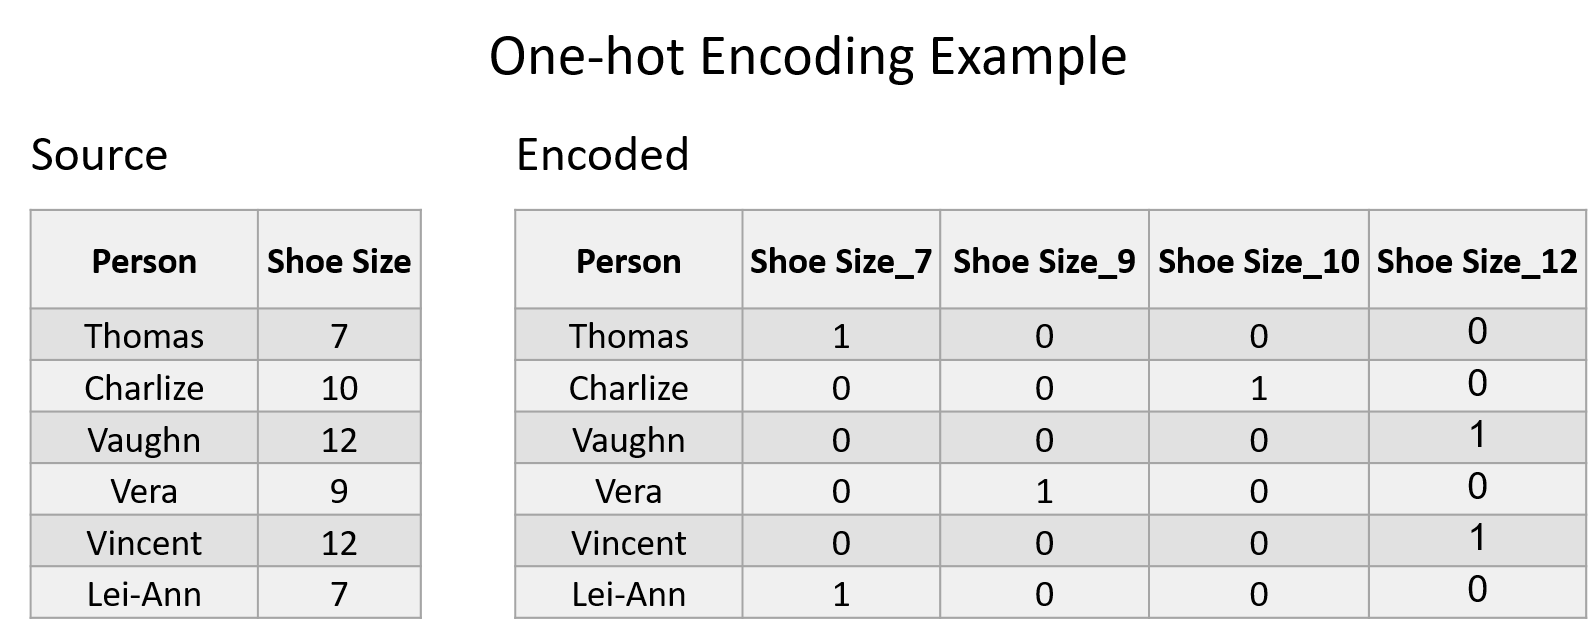

In [75]:
from IPython.display import Image
Image("C:/Users/jy990/anaconda3/DMI/data cleaning/data/one_hot.png")

TIP: 원핫 인코딩(One-hot encoding)은 처음 보는 사람들에게 다소 혼동스러운 내용이지만, 이를 이해하는 것은 중요하다. 예를 들어, 다운스트림 예측에서 가장 인기있는 분류기는 트리 기반 기법이고, 원핫 인코딩은 이러한 기법들에 대한 범주를 입력하기 위한 최신 솔루션으로 간주된다.

원핫 인코딩의 단점은 소스에서 가용하지 않은 새로운 상태를 외삽(extrapolate)하는 것이 불가능하다는 것이다. 예에서, 소스 데이터에 사이즈 11이 없기 때문에 Shoe Size=11을 정의할 수 있는 방법은 없다. 이는 다운스트림 분석에서 Shoe Size=11 상태에 접근할 수 없게 되는 부작용을 낳는다.

예제에서와 같은 long jump 데이터셋과 '순서적 인코딩(**Ordinal Encoding**)' 절에서 사용햇던 cats 리스트를 사용할 것이다. **OneHotEncoder** 모듈을 임포트하고 encoder 객체를 생성하자. 이어서 cats 리스트 내의 변수들을 적합시키고 변환시킬 것이다. 다음으로 scikit-learn의 **.get_feature_next()** 기법을 사용해서 새로운 열 이름을 불러오고 점검을 위해 출력할 것이다.

In [76]:
# 라이브러리를 임포트하고 enc 객체를 초기화한다
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# 한 번에 객체를 적합 및 변환하고 범주를 출력한다
out_enc = enc.fit_transform(df[cats])
new_cols = enc.get_feature_names_out(cats).tolist()
print(new_cols)

['Jersey Size_0.0', 'Jersey Size_1.0', 'Jersey Size_2.0', 'Shoe Size_0.0', 'Shoe Size_1.0', 'Shoe Size_2.0', 'Shoe Size_3.0']


이 결과는 예상한 것과 잘 맞는다. 데이터에서 가능한 상태를 표현하는 각 플래그에 대한 특징 열은 "Jersey Size_medium"과 "Shoe Size_10"이다.

이제 소스 열을 새로운 원핫 특징으로 바꿔준다. cats 리스트에서 원래 열을 제거한 뒤, 소스에 있는 임시 데이터프레임의 값들을 연결해 그 작업을 수행할 수 있다.

In [77]:
# 원래 데이터와 연결된 임시 데이터프레임 df_enc를 생성한다
df_enc = pd.DataFrame(data = out_enc, columns = new_cols)
df_enc.index = df.index

# 원래 열을 삭제하고 새로운 열과 연결시킨다
df.drop(cats, axis=1, inplace=True)
df = pd.concat([df, df_enc], axis = 1)
print(df.columns)

Index(['Age', 'Height', 'Weight', 'Training Hours/week', 'Jersey Color',
       'Long Jump', 'Jersey Size_0.0', 'Jersey Size_1.0', 'Jersey Size_2.0',
       'Shoe Size_0.0', 'Shoe Size_1.0', 'Shoe Size_2.0', 'Shoe Size_3.0'],
      dtype='object')


In [78]:
df

,Age,Height,Weight,Training Hours/week,Jersey Color,Long Jump,Jersey Size_0.0,Jersey Size_1.0,Jersey Size_2.0,Shoe Size_0.0,Shoe Size_1.0,Shoe Size_2.0,Shoe Size_3.0
Person,,,,,,,,,,,,,
Thomas,12,57.5,73.4,6.5,blue,19.2,0.0,0.0,1.0,1.0,0.0,0.0,0.0
Jane,13,65.5,85.3,8.9,green,25.1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Vaughn,17,71.9,125.9,1.1,green,14.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Vera,14,65.3,100.5,7.9,red,18.3,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Vincent,18,70.1,110.7,10.5,blue,21.1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Lei-Ann,12,52.3,70.4,0.5,blue,10.6,0.0,0.0,1.0,1.0,0.0,0.0,0.0


#### 레이블 인코딩(Label Encoding)

때때로 인코딩이 필요한 열은 레이블 혹은 결과 열이다. 이런 상황에서 scikit-learn은 단일 열을 인코딩하는 **LabelEncoder** 모듈을 제공한다. 이 모듈은 정수 혹은 문자열 입력에서 작동한다. 다음 코드는 두 경우 모두에 대한 예를 보여준다.

In [79]:
# 모듈을 임포트하고 enc 객체를 초기화한다
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

# 정수 레이블로 적합시키고 변환한다
out_enc = enc.fit_transform([1, 2, 5, 2, 4, 2, 5])   # 1, 2, 4, 5
print(out_enc)

# 문자열 레이블로 적합시키고 변환한다
out_enc = enc.fit_transform(["blue", "red", "blue", "green", "red", "red"])   # blue, green, red
print(out_enc)

[0 1 3 1 2 1 3]
[0 2 0 1 2 2]
